In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [73]:
# functions used in this program:

# data manipulation------------------------------------------------------------------------

def data_to_num(data):
    for (columnName, columnData) in data.iteritems():
        if (data[columnName].dtype == 'object'):
            data[columnName] = data[columnName].astype('category')

    cat_columns = data.select_dtypes(['category']).columns
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
    
    return data

def data_clean(inpatients):
    inpatients = inpatients.drop('encounter_id', axis=1)
    inpatients = inpatients.replace(to_replace='?', value='NaN')

    age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
    inpatients['age'] = inpatients['age'].map(age_dict)
    inpatients['age'] = inpatients['age'].astype('int64')
    
    #inpatients = inpatients.drop_duplicates(subset= ['patient_nbr2'], keep = 'first')
    
    inpatients = inpatients.drop(drop_col, axis=1)
    inpatients = inpatients.fillna(inpatients.mode().iloc[0])
    
    inpatients = data_to_num(inpatients)
    
    return inpatients

# data visualization-----------------------------------------------------------------------

def heat_map(data):
    corr = data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.show()
    
# models-----------------------------------------------------------------------------------

def neural_network(sample_train, sample_label):
    train_features, test_features, train_labels, test_labels = train_test_split(sample_train, sample_label, test_size=0.30)
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(train_features, train_labels)  
    
    y_pred = clf.predict(test_features)
    
    print("Accuracy: ", metrics.accuracy_score(test_labels, y_pred))
    print(confusion_matrix(test_labels, y_pred))
    print(classification_report(test_labels, y_pred))
    
def k_nearest_neighbour(sample_train, sample_label):
    train_features, test_features, train_labels, test_labels = train_test_split(sample_train, sample_label, test_size=0.50)
    clf = KNeighborsClassifier(n_neighbors=25, weights='distance', p=1)
    clf.fit(train_features, train_labels)
    
    y_pred = clf.predict(test_features)
    
    print("Accuracy: ", metrics.accuracy_score(test_labels, y_pred))
    print(confusion_matrix(test_labels, y_pred))
    print(classification_report(test_labels, y_pred))
    
def naive_bayes(sample_train, sample_label):
    train_features, test_features, train_labels, test_labels = train_test_split(sample_train, sample_label, test_size=0.30)
    clf = GaussianNB()
    clf.fit(train_features, train_labels)
    
    y_pred = clf.predict(test_features)
    
    print("Accuracy: ", metrics.accuracy_score(test_labels, y_pred))
    print(confusion_matrix(test_labels, y_pred))
    print(classification_report(test_labels, y_pred))
    
def random_forest(train, train_labels, test):
    #train_features, test_features, train_labels, test_labels = train_test_split(sample_train, sample_label, test_size=0.30)
    clf = RandomForestClassifier(n_estimators=100)

    # train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train, train_labels)
    y_pred = clf.predict(test)

    # accuracy
    #print("Accuracy: ", metrics.accuracy_score(test_labels, y_pred))
    #print(pd.Series(clf.feature_importances_, list(filter((lambda x: x != "YES"), sample_train))).sort_values(ascending=False))
    #print(metrics.classification_report(test_labels, y_pred))
    #print(metrics.confusion_matrix(test_labels, y_pred))
    
    return y_pred

In [3]:
inpatients_train = pd.read_csv("C2T1_Train.csv")
inpatients_test = pd.read_csv("C2T1_Test.csv")

I removed the 'encounter_id2' feature because every value is unique, thus it does not provide any information. I also replaced all of the '?' values in the dataset to 'NaN' so that I can use pandas based functions to count missing values. Also, for the first problem, we only want to see if a patient was readmitted or not, regardless of how much time passed before they were readmitted. So I will create a duplicate dataset but the class labels will only be either 'YES' or 'NO'.

In [137]:
inpatients.drop('encounter_id2', axis=1, inplace=True)
inpatients = inpatients.replace(to_replace='?', value='NaN')

age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
inpatients['age'] = inpatients['age'].map(age_dict)
inpatients['age'] = inpatients['age'].astype('int64')

inpatients = inpatients.drop_duplicates(subset= ['patient_nbr2'], keep = 'first')

inpatients2 = inpatients.replace(to_replace='>30', value='YES')
inpatients2 = inpatients2.replace(to_replace='<30', value='YES')

In [110]:
inpatients2 = inpatients.replace(to_replace='>30', value='YES')
inpatients2 = inpatients2.replace(to_replace='<30', value='YES')

patient_nbr2 only has 65765 unique values out of 90766, which means either there are missing values or duplicate values. Below we see that there are no null values for patient numbers, but in fact there are duplicates, which means that there are people that were admitted to the hospital multiple times. I removed the records that are subsequent visits to the hospital.

Looking at the distribution of the class label. This dataset is very balanced between not readmitted and readmitted patients.

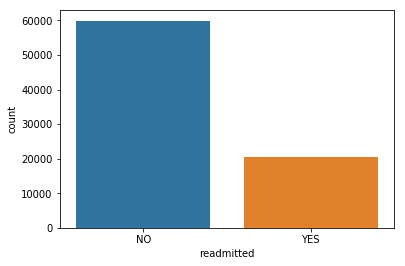

In [63]:
sns.countplot(inpatients['readmitted'])
sns.countplot(inpatients2['readmitted'])

Below I decided to see the frequency of drug use for the patients, and found that out of the 23 drugs, 11 of them are used by less than 100 people (out of 90,766). 2 of them were not administered to anybody, and 4 others were only administered to 1 or 2 people. I will likely remove them.

In [ ]:
drug_use = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
            'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
            'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
print('Number of drugs: ', len(drug_use))
for (columnName) in drug_use:
     if len(inpatients[inpatients[columnName] == 'No']) > 90700:
        print('Missing values in ', columnName, ': ', len(inpatients[inpatients[columnName] == 'No']))

Before I actually remove any of these columns, I want to see the correlations between attributes. I will create some heat maps and compare different features. If any features are highly correlated with each other, I will remove them. 

After looking at different groups of features and inspecting their heatmaps, I found that none of the columns in this dataset are highly correlated. This means that there is no redundant data, thus I should not remove them based on correlation. 

In [ ]:
heat_map(data_to_num(inpatients[drug_use])

Now, I will use a random forest for to inspect feature importances of the remaining features to see if any of them are not important. I will also use the random forest to validate dropping rows. I will run the random forest with all features, all features without any of the drug features, and without the aforementioned features that I considered dropping. Below I also tried some other models, but the random forest performed the best out of all of them.

In [111]:
train = data_to_num(inpatients2.drop(drug_use, axis=1))
sample_label = train['readmitted']
sample_train = train.drop(['readmitted'], axis=1)
random_forest(sample_train, sample_label)

NameError: name 'drug_use' is not defined

After trying the random forest 3 times with different features, I found that the accuracy is about the same with our without the drug features. Since they perform about the same, I will remove those features, as they don't provide much information. Also, since the 3 diagnoses features are the most important, I will removed records that don't contain any of them.

In [5]:
drop_col = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
            'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
            'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'weight','payer_code','medical_specialty']

In [130]:
inpatients2_dropped = inpatients2.drop(drop_col, axis=1)
inpatients2_imputed = inpatients2_dropped.fillna(inpatients2_dropped.mode().iloc[0])

inpatients_dropped = inpatients.drop(drop_col, axis=1)
inpatients_imputed = inpatients_dropped.fillna(inpatients_dropped.mode().iloc[0])

In [131]:
train = data_to_num(inpatients_dropped)
sample_label = train['readmitted']
sample_train = train.drop(['readmitted'], axis=1)

In [31]:
train = data_clean(inpatients_train)
labels = train['readmitted']
train.drop(['readmitted'], axis=1, inplace=True)

In [32]:
train.shape

(65765, 22)

In [74]:
test = data_clean(inpatients_test)
test.drop(['readmitted'], axis=1, inplace=True)

In [28]:
train.drop(['readmitted'], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [62]:
ids = inpatients_test.iloc[:,0].values
patient_nbr = inpatients_test.iloc[:,1].values

In [77]:
test_labels.shape

(11000,)

In [78]:
submission = np.column_stack((ids, patient_nbr, test_labels))

In [79]:
np.savetxt("C2T1_Test_Lableled.csv", submission, delimiter=",")